In [1]:
# import relevant libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm

In [2]:
# import dataset
data = pd.read_csv('train.csv')

In [3]:
# first glance
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# getting shape of the dataset
data.shape

(1460, 81)

In [5]:
# check whether column "Id" is unique 
data['Id'].is_unique

True

In [6]:
# set column "Id" as index
data.set_index('Id')

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [7]:
# additional info about dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

read data-description file to make sense of column names

In [8]:
# group columns by data types to see all
types = data.columns.to_series().groupby(data.dtypes).groups
types

{dtype('int64'): Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
        'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
        'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
        'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
        'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
        'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
        'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
       dtype='object'),
 dtype('float64'): Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object'),
 dtype('O'): Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
        'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
        'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
        'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
        'BsmtQual', 

In my opnion, it makes more sense to convert the type of these columns from int to float:
- LotArea
- BsmtFinSF1
- BsmtUnfSF
- TotalBsmtSF
- 1stFlrSF 
- 2ndFlrSF
- LowQualFinSF
- GrLivArea
- GarageArea
- WoodDeckSF
- PoolArea
- MiscVal
- SalePrice

and from float to int:
- GarageYrBlt

In [9]:
# convert those columns from int to float
cols = ['BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 
'GarageArea', 'WoodDeckSF', 'PoolArea', 'MiscVal', 'SalePrice']
for col in cols:
   data[col] = data[col].apply(lambda types: float(types) if types == types else "")

In [10]:
# convert float to int
# because of NaN, had to fill them with 0 first
data['GarageYrBlt'].isnull().value_counts()
data['GarageYrBlt']
data['GarageYrBlt'] = data['GarageYrBlt'].fillna(0)
data['GarageYrBlt'] = data['GarageYrBlt'].astype(int)
data['GarageYrBlt']

0       2003
1       1976
2       2001
3       1998
4       2000
        ... 
1455    1999
1456    1978
1457    1941
1458    1950
1459    1965
Name: GarageYrBlt, Length: 1460, dtype: int64

In [11]:
# explore potential correlation between housing features and sale price
# regression can only be done with numeric features, those are:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


I assume, the following features could be an indicator for sale price. I will run linear regression between them and price.
- OverallCond: 1 very poor, 10 very excellent
- YearBuilt
- TotalBsmtSF: total sf of basement area
- Bedroom
- TotRmsAbvGrd
- PoolArea
- YrSold

In [12]:
# for an easier overview I make a subset of relevant features I want to examine
subset = data[['OverallCond', 'YearBuilt', 'TotalBsmtSF', 'BedroomAbvGr', 'TotRmsAbvGrd', 'PoolArea', 'YrSold', 'SalePrice']]
subset

,OverallCond,YearBuilt,TotalBsmtSF,BedroomAbvGr,TotRmsAbvGrd,PoolArea,YrSold,SalePrice
0,5,2003,856.0,3,8,0.0,2008,208500.0
1,8,1976,1262.0,3,6,0.0,2007,181500.0
2,5,2001,920.0,3,6,0.0,2008,223500.0
3,5,1915,756.0,3,7,0.0,2006,140000.0
4,5,2000,1145.0,4,9,0.0,2008,250000.0
...,...,...,...,...,...,...,...,...
1455,5,1999,953.0,3,7,0.0,2007,175000.0
1456,6,1978,1542.0,3,7,0.0,2010,210000.0
1457,9,1941,1152.0,4,9,0.0,2010,266500.0
1458,6,1950,1078.0,2,5,0.0,2010,142125.0


In [13]:
# checking for missing values
def check_missing_data(df):
    # check for any missing data in the df (display in descending order)
    return df.isnull().sum().sort_values(ascending=False)
check_missing_data(subset)

SalePrice       0
YrSold          0
PoolArea        0
TotRmsAbvGrd    0
BedroomAbvGr    0
TotalBsmtSF     0
YearBuilt       0
OverallCond     0
dtype: int64

All variables I want to examine dont have any missing values.

In [14]:
# running a simple regression between overall condition and sale price 
# assumption: the better the condition, the more expensive the price
df1 = pd.DataFrame({"y": subset["SalePrice"], "x": subset["OverallCond"]})
df1 = sm.add_constant(df1)

lin_reg1 = sm.OLS(df1["y"], 
                  df1[["const", "x"]]).fit()

lin_reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     8.892
Date:                Mon, 14 Sep 2020   Prob (F-statistic):            0.00291
Time:                        23:08:07   Log-Likelihood:                -18540.
No. Observations:                1460   AIC:                         3.708e+04
Df Residuals:                    1458   BIC:                         3.709e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.119e+05   1.06e+04     19.997      0.000    1.91e+05    2.33e+05
x          -5558.1154   1863.962     -2.982      0.003   -9214.449   -1901.782
==============================================================================
Omnibus:                      601.288   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3406.241
Skew:                           1.843   Prob(JB):                         0.00
Kurtosis:                       9.512   Cond. No.                         29.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

According to adjusted R^2, only 0,5% of variance is explained by the regression model.

In [15]:
# visualization of the regression model
df1 = df1.assign(y_hat1=lin_reg1.predict(df1[["const", "x"]]))
df1

,const,y,x,y_hat1
0,1.0,208500.0,5,184119.015687
1,1.0,181500.0,8,167444.669603
2,1.0,223500.0,5,184119.015687
3,1.0,140000.0,5,184119.015687
4,1.0,250000.0,5,184119.015687
...,...,...,...,...
1455,1.0,175000.0,5,184119.015687
1456,1.0,210000.0,6,178560.900326
1457,1.0,266500.0,9,161886.554242
1458,1.0,142125.0,6,178560.900326


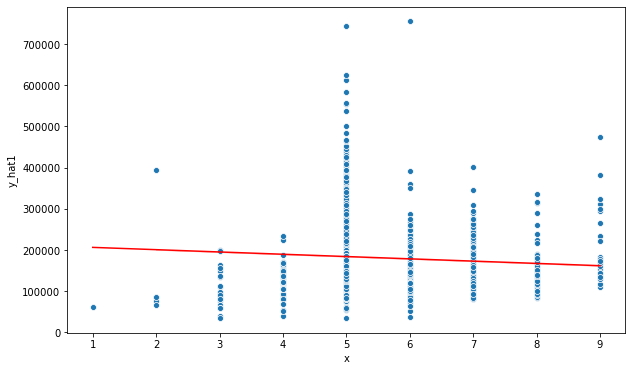

In [16]:
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(data=df1,
                x="x",
                y="y",
                ax=ax);

sns.lineplot(data=df1,
             x="x",
             y="y_hat1",
             color="red",
             ax=ax);

 Also the visualization shows us, that the linear regression doesnt capture the relationship well. The regression model should have an increasing slope instead of a decreasing one. This is very likely due to outliers.

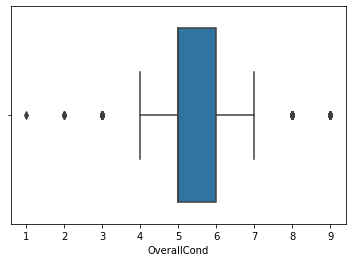

In [17]:
# detecting outliers for overall condition feature
sns.boxplot(x=subset['OverallCond'])

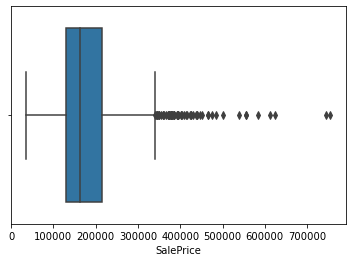

In [18]:
sns.boxplot(x=subset['SalePrice'])

It doesnt make sense to remove the outliers from overall condition and sale price individually. 
The "common" outliers (e.g. the very high points on 2, 5, 6 in linear regression 1 diagram) should be removed to have a proper regression, but as for now, I dont know how to do that.

In [19]:
# running a simple regression between year the house was built and sale price 
# assumption: the later the building year, the more expensive the price
df2 = pd.DataFrame({"y": subset["SalePrice"], "x": subset["YearBuilt"]})
df2 = sm.add_constant(df2)

lin_reg2 = sm.OLS(df2["y"], 
                  df2[["const", "x"]]).fit()

lin_reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.273
Method:                 Least Squares   F-statistic:                     548.7
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          2.99e-103
Time:                        23:08:08   Log-Likelihood:                -18311.
No. Observations:                1460   AIC:                         3.663e+04
Df Residuals:                    1458   BIC:                         3.664e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -2.53e+06   1.16e+05    -21.858      0.000   -2.76e+06    -2.3e+06
x           1375.3735     58.717     23.424      0.000    1260.194    1490.553
==============================================================================
Omnibus:                      761.903   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6856.947
Skew:                           2.264   Prob(JB):                         0.00
Kurtosis:                      12.603   Cond. No.                     1.29e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Only 27,3% of the variance is explained by the linear regression model. 

In [20]:
df2 = df2.assign(y_hat2=lin_reg2.predict(df2[["const", "x"]]))
df2

,const,y,x,y_hat2
0,1.0,208500.0,2003,224564.810545
1,1.0,181500.0,1976,187429.726911
2,1.0,223500.0,2001,221814.063609
3,1.0,140000.0,1915,103531.945367
4,1.0,250000.0,2000,220438.690141
...,...,...,...,...
1455,1.0,175000.0,1999,219063.316673
1456,1.0,210000.0,1978,190180.473847
1457,1.0,266500.0,1941,139291.655533
1458,1.0,142125.0,1950,151670.016745


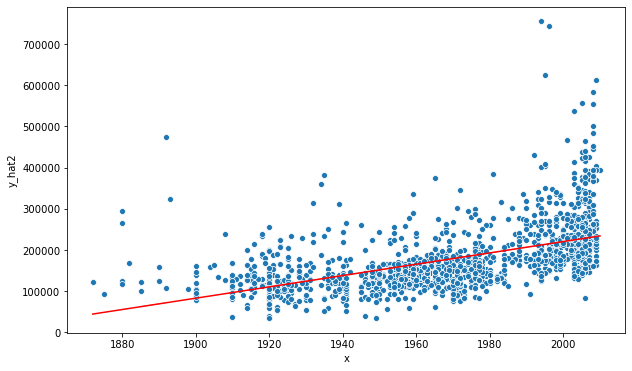

In [21]:
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(data=df2,
                x="x",
                y="y",
                ax=ax);

sns.lineplot(data=df2,
             x="x",
             y="y_hat2",
             color="red",
             ax=ax);

Assumtion confirmed. According to the regression model, the later the house was built, the more expensive its price.
For each year later, it's about 1,375 more expensive.

In [22]:
# running a simple regression between basement area and sale price 
# assumption: the larger the basement area, the more expensive the price
df3 = pd.DataFrame({"y": subset["SalePrice"], "x": subset["TotalBsmtSF"]})
df3 = sm.add_constant(df3)

lin_reg3 = sm.OLS(df3["y"], 
                  df3[["const", "x"]]).fit()

lin_reg3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.376
Method:                 Least Squares   F-statistic:                     880.3
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          9.48e-152
Time:                        23:08:10   Log-Likelihood:                -18199.
No. Observations:                1460   AIC:                         3.640e+04
Df Residuals:                    1458   BIC:                         3.641e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.343e+04   4286.892     14.796      0.000     5.5e+04    7.18e+04
x            111.1096      3.745     29.671      0.000     103.764     118.455
==============================================================================
Omnibus:                      386.381   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5810.518
Skew:                           0.809   Prob(JB):                         0.00
Kurtosis:                      12.638   Cond. No.                     2.99e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.99e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

37,6% of variance is explained according to the adjusted R^2. It is a positive slope, meaning the larger the basement area, the more expensive is the price.

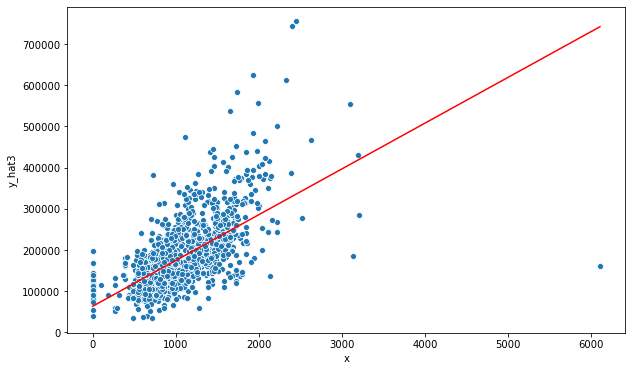

In [23]:
# visualization
df3 = df3.assign(y_hat3=lin_reg3.predict(df3[["const", "x"]]))

fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(data=df3,
                x="x",
                y="y",
                ax=ax);

sns.lineplot(data=df3,
             x="x",
             y="y_hat3",
             color="red",
             ax=ax);

Those single linear regressions can be run for each of the other housing features. In the following, I run a multiple linear regression for all 3 features: overall condition, year built and basement area.

In [26]:
# multiple linear regression
X = subset[['OverallCond', 'YearBuilt', 'TotalBsmtSF']]
X = sm.add_constant(X)
X

,const,OverallCond,YearBuilt,TotalBsmtSF
0,1.0,5,2003,856.0
1,1.0,8,1976,1262.0
2,1.0,5,2001,920.0
3,1.0,5,1915,756.0
4,1.0,5,2000,1145.0
...,...,...,...,...
1455,1.0,5,1999,953.0
1456,1.0,6,1978,1542.0
1457,1.0,9,1941,1152.0
1458,1.0,6,1950,1078.0


In [27]:
mlr = sm.OLS(subset['SalePrice'], X).fit()
mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     467.5
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          1.08e-212
Time:                        23:09:00   Log-Likelihood:                -18052.
No. Observations:                1460   AIC:                         3.611e+04
Df Residuals:                    1456   BIC:                         3.613e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.991e+06   1.14e+05    -17.497      0.000   -2.21e+06   -1.77e+06
OverallCond  1.084e+04   1441.540      7.521      0.000    8013.908    1.37e+04
YearBuilt    1023.9473     56.867     18.006      0.000     912.397    1135.498
TotalBsmtSF    88.2198      3.682     23.959      0.000      80.997      95.443
==============================================================================
Omnibus:                      560.666   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8795.694
Skew:                           1.358   Prob(JB):                         0.00
Kurtosis:                      14.714   Cond. No.                     1.72e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.72e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

According to adjusted R^2, 49% of the variance can be explained with the model. The slope is positive.

In [28]:
X = X.assign(y_hat=mlr.predict(X[['const', 'OverallCond', 'YearBuilt', 'TotalBsmtSF']]))
X

,const,OverallCond,YearBuilt,TotalBsmtSF,y_hat
0,1.0,5,2003,856.0,189405.583441
1,1.0,8,1976,1262.0,230101.104719
2,1.0,5,2001,920.0,193003.752911
3,1.0,5,1915,756.0,90476.247184
4,1.0,5,2000,1145.0,211829.249525
...,...,...,...,...,...
1455,1.0,5,1999,953.0,193867.110111
1456,1.0,6,1978,1542.0,235167.276656
1457,1.0,9,1941,1152.0,195400.403538
1458,1.0,6,1950,1078.0,165562.788330
